# Mechanistic model of Telomere Length Homeostasis
## Ghanendra Singh and Srirak K.
### Center for Computational Biology IIIT Delhi

In [1]:
#Import libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.optimize import fsolve
import scipy.stats as st
import pandas as pd
import matplotlib.image as mpimg

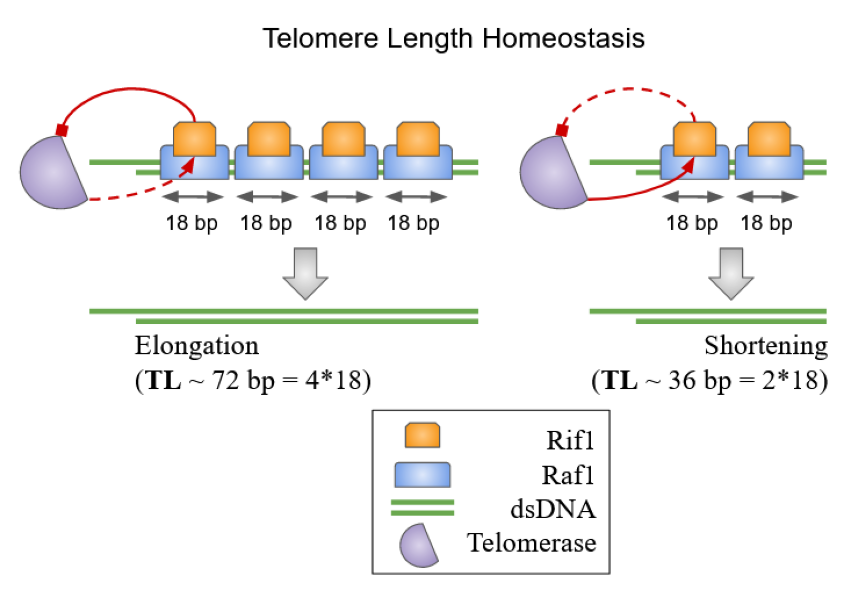

In [2]:
img = mpimg.imread('TLH/TLH_2.PNG')
plt.figure(figsize=(15,15))
plt.axis('off')
imgplot = plt.imshow(img)

## 1D Futile Cycle Model

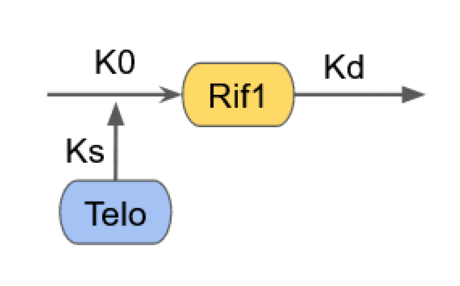

In [3]:
img = mpimg.imread('TLH/1d_ckt_m1.PNG')
plt.figure(figsize=(8,8))
plt.axis('off')
imgplot = plt.imshow(img)

### 1.A Deterministic

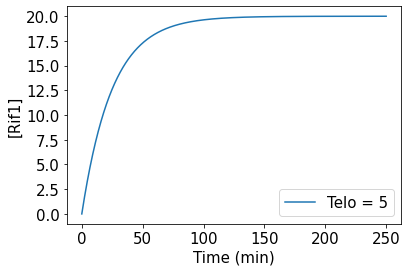

In [55]:
#Deterministic equation

#Function for 1D ODE
def TLH_1d(Rif1,t):
    # 1D ODE model
    dRif1dt = k0 + ks*Telo - kd*Rif1
    return dRif1dt

#Parameters
k0 = 0.6  # Basal production rate (Rif1)
ks = 0.04 # Telomerase (Telo) induces Rif1 production
kd = 0.04 # Degradation rate (Rif1)
Telo = 5.0  # Telomerase concentration

#Initial condition
Rif1_ini = 0

#Time
t = np.linspace(0,250,1000)

#ODE Integration
z = odeint(TLH_1d,Rif1_ini,t)

#Plot
plt.plot(t,z,label='Telo = %d'%Telo)
plt.xlabel('Time (min)',fontsize='15')
plt.ylabel('[Rif1]',fontsize='15')
plt.xticks(fontsize='15')
plt.yticks(fontsize='15')
plt.legend(loc='lower right',fontsize='15')
plt.show()

### 1.B Stochastic

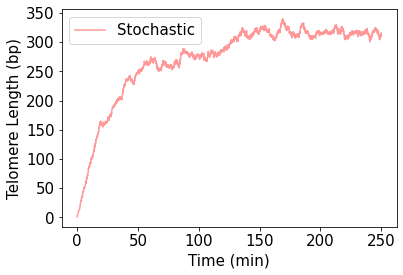

In [56]:
# Stochastic 1D Model
def TLH_stoc_1d(Omega,TELO,RIF1):
    
    #Parameters
    k0 = 0.6
    ks = 0.04
    kd = 0.04
    
    #Initial values
    Telo = TELO
    Rif1 = RIF1
    # Aray
    time = []
    mol_Rif1  = []
    
    #Time
    T = 250
    t = 0
    # Propensity factor
    V = Omega
    
    #Loop till time T 
    while t<T:
        
        # Rates for Gillespie
        rates = [k0*V,ks*Telo, kd*Rif1]
        rate_sum = sum(rates)
        #Select random time steps.
        tau = -np.log(np.random.uniform(0,1))/rate_sum
        t+=tau     #time point of next event
        r = np.random.rand()*rate_sum  # Reaction selection

        # Basal Rif1 Production
        if (r>0 and r<rates[0]):
            Rif1 += 1
        # Telo induced Rif1 production
        elif(r>rates[0] and r<sum(rates[0:2])):
            Rif1 += 1        
        # Rif1 Degradation
        elif(r>rates[1] and r<sum(rates)):
            Rif1 -= 1
        # Store value at each time step    
        time.append(t)       
        mol_Rif1.append(Rif1/V*18)
        
        #time.append(t/120) # to convert time into divisions
        #mol_Rif1.append(Rif1/V*18) # to convert Rif1 into Telomere Length (bp)
    
    return mol_Rif1,time

#Initial values for function
RIF1 = 0
OMEGA = 20
TELO = 20
# Call TLH_stoc_1d
rif1_1d,time_1d = TLH_stoc_1d(OMEGA,TELO,RIF1)

#Plot

#Uncomment to plot Deterministic plot also
#z = odeint(TLH_1d,Rif1_ini,t)
#plt.plot(t,z*18,'--k',label='Deterministic')
plt.plot(time_1d,rif1_1d,'-r',label='Stochastic',alpha=0.4)
plt.xlabel('Time (min)',fontsize='15')
#plt.ylabel('No. of Rif1',fontsize='15')

#Uncomment to plot TL
plt.ylabel('Telomere Length (bp)',fontsize='15')
plt.xticks(fontsize='15')
plt.yticks(fontsize='15')
plt.legend(fontsize='15')
#plt.grid()
plt.show()

### 1.C Telomere Length


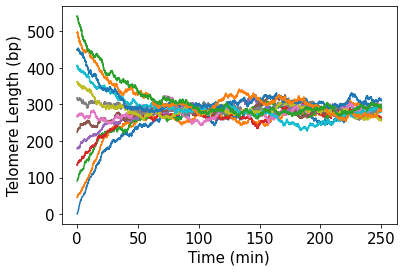

In [57]:
# Modify 1D model to convert Rif1 into TL # If already modified to include 18, don't change.

#Iterate TL between (50-600 bp)
for RIF1_i in range(0,650,50):
    rif1_1d,time_1d = TLH_stoc_1d(20,20,RIF1_i)

    plt.plot(time_1d,rif1_1d,alpha=1)

plt.xlabel('Time (min)',fontsize='15')
plt.ylabel('Telomere Length (bp)',fontsize='15')
plt.xticks(fontsize='15')
plt.yticks(fontsize='15')
#plt.grid()
plt.show()

### 1.D TL distribution
* This part can take several minutes to simulate. Please be patient

In [161]:
#TL distribution

#Check if the distribution is for TL (Telomere length) or RIf1 conc.

#Initial Concentration
# Modify TELO=5, TELO =20 to get distributions for different initial Telo concentrations
TELO = 30
Rif_d_1dm = []
Time_d_1dm = []
# Reduce total no. of time steps from 1000 to 100 to simulate quickly.
for i in range(1000):
    RIF,TD = TLH_stoc_1d(20,TELO)
    Rif_d_1dm.append(RIF[-1])

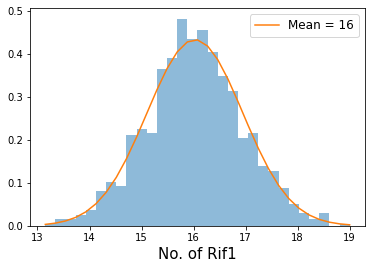

In [138]:
#Convert histogram into bins
_, bins, _ = plt.hist(Rif_d_1dm, 30, density=1, alpha=0.5)
# Find mean and standard deviation
mu, sigma = st.norm.fit(Rif_d_1dm)
# Fit the line over data
best_fit_line = st.norm.pdf(bins, mu, sigma)
#Plot
plt.plot(bins, best_fit_line,label='Mean = %d'%round(mu))
#plt.title('Histogram of Rif1 conc.')
plt.xlabel('No. of Rif1', fontsize=15)
plt.legend(fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.show()

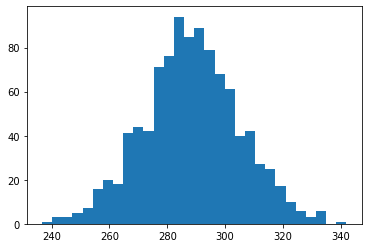

In [139]:
#Convert Rif1 distribution into TL.
# Only needed if stochastic simulation is done for Rif1 concentration.
TL_arr = []
for i in Rif_d_1dm:
    TL_arr.append(i*18)
plt.hist(TL_arr,30)
plt.show()

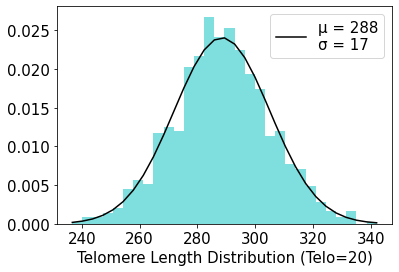

In [160]:
_, bins, _ = plt.hist(TL_arr, 30, density=1, alpha=0.5,color='c')
# Find mean and standard deviation
mu, sigma = st.norm.fit(TL_arr)
best_fit_line = st.norm.pdf(bins, mu, sigma)
#Plot
plt.plot(bins, best_fit_line,'-k',label='μ = %0.0f\nσ = %0.0f'%(mu,sigma))
#plt.title('Distribution of TL for Telo=0')
plt.xlabel('Telomere Length Distribution (Telo=%d)'%TELO,fontsize=15)
plt.legend(loc='upper right',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
#plt.xlim([0,400])
plt.show()


### Rate plot 1D model

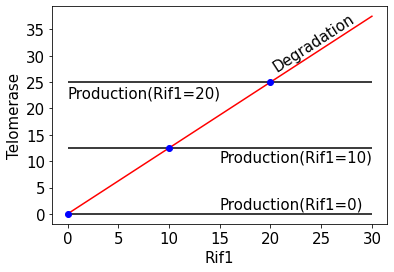

In [56]:
#Rate plot equations V1 vs V2

#Steady states
def Rif1_ss(Telo):
    return ks/kd*Telo

def Telo_ss(Telo):
    return ks2/(kd2*Telo)


#Parameters
ks = 0.1
kd = 0.08
ks2 = 4
kd2 = 0.0125

#Range
Telo_min = 0
Telo_max = 30
Telo = np.linspace(0,Telo_max)

#Plot
plt.plot(Telo,Rif1_ss(Telo),'r',label='Telo')
for rif in range(0,30,10):
    # Telomere Length Steady state value TLss 
    TLss = (ks*Telo)/kd
    plt.plot(rif, Rif1_ss(rif), 'b',marker='o')
    plt.hlines(Rif1_ss(rif),0,Telo_max,'k',label='Rif = %d'%rif)

#Plot text
plt.text(15,1,'Production(Rif1=0)',fontsize=15)
plt.text(15,10,'Production(Rif1=10)',fontsize=15)
plt.text(0,22,'Production(Rif1=20)',fontsize=15)
plt.text(20,27,'Degradation',rotation = 33,fontsize=15)
#plt.title('Fig 2D. Rate balance plot')
#plt.legend(loc='lower right',fontsize='15')
plt.xlabel('Rif1',fontsize='15')
plt.ylabel('Telomerase',fontsize='15')
#plt.ylim([-10,40])
plt.xticks(fontsize='15')
plt.yticks(fontsize='15')
#plt.grid()
plt.show()

## 2D Model with a negative feedback loop

### 2.A Circuit diagram

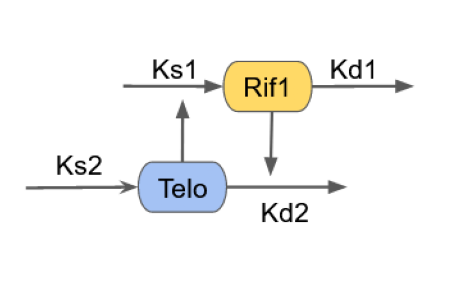

In [44]:
img = mpimg.imread('TLH/2d_ckt_m1.PNG')
plt.figure(figsize=(8,8))
plt.axis('off')
imgplot = plt.imshow(img)

### 2.B Phase plane analysis

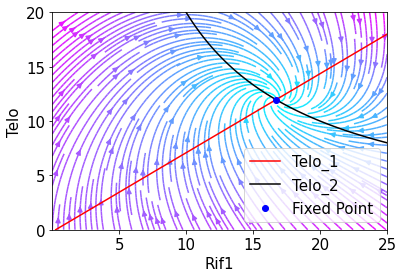

In [91]:
#Function for 2D model
def TLH_2d(x,t):
    Rif1,Telo = x
    #ODEs
    dRif1dt = k0 + ks1*Telo - kd1*Rif1
    dTelodt = ks2 - kd2*Telo*Rif1
    return dRif1dt,dTelodt

#params
k0 = 0.02
ks1 = 0.11
kd1 = 0.08
ks2 = 2
kd2 = 0.01

#Function to solve system of 2D odes.
def Rss(x):
    return [k0 + ks1*x[1] - kd1*x[0], ks2-kd2*x[1]*x[0] ]

# specify range of variables
npts= 100
# Range for Rif1 and Telo
Rmin, Rmax= 0.01, 25.0
Tmin, Tmax= 0.01, 20.0
Rif1= np.linspace(Rmin, Rmax, npts)
Telo= np.linspace(Tmin, Tmax, npts)

#Null clines
plt.figure()
# plot nullclines
plt.plot((k0+ks1*Telo)/kd1,Telo, 'r',label='Telo_1')
plt.plot(ks2/(kd2*Telo),Telo, 'k',label='Telo_2')

# Find steady-state solutions using an initial guess
#Solve ODE
sol1= fsolve(Rss, [1,1])
plt.plot(sol1[0],sol1[1], 'bo',label='Fixed point')

# Find and plot direction arrows (dP, dM)
R, T= np.meshgrid(Rif1, Telo)
dR, dT= TLH_2d([R, T], 0.0)
# calculate magnitude of total rate of change
norm= np.sqrt(dR**2 + dT**2)
# colour of direction arrow is magnitude of total rate of change
sp = plt.streamplot(R, T, dR, dT, color= norm, cmap= plt.cm.cool, density= 2)

# Label and show figure
plt.xlim([Rmin, Rmax])
plt.ylim([Tmin, Tmax])
plt.xlabel('Rif1',fontsize=15)
plt.ylabel('Telo',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks([0,5,10,15,20],fontsize=15)
plt.legend(['Telo_1','Telo_2','Fixed Point'],loc='lower right',fontsize=15)
plt.show()

#print('Sol',sol1)
#print('Fixed point',sol1[0]*18,sol1[1])

### 2.C Deterministic

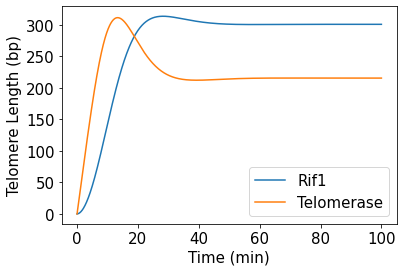

In [58]:
#Deterministic 2D Model

#Function for 2D ODE model
def TLH_2d(x,t):
    Rif1 = x[0]
    Telo = x[1]
    #2D ODEs
    dRif1dt = k0 + ks1*Telo - kd1*Rif1
    dTelodt = ks2 - kd2*Telo*Rif1
    return dRif1dt,dTelodt

#Parameters
k0 = 0.02
ks1 = 0.11
kd1 = 0.08
ks2 = 2
kd2 = 0.01

#Initial condition
rif1_i = 0
telo_i = 0
init = [rif1_i,telo_i]

# Time
t = np.linspace(0,100,1000)

#Integrate system of ODEs
z_2d = odeint(TLH_2d,init,t)

#Plot
plt.plot(t,z_2d[:,0]*18,label='Rif1') #~18-25')
plt.plot(t,z_2d[:,1]*18,label='Telomerase') #~16-20')
plt.xlabel('Time (min)',fontsize='15')
plt.ylabel('Telomere Length (bp)',fontsize='15')
plt.legend(loc='lower right',fontsize='15')
plt.xticks(fontsize='15')
plt.yticks(fontsize='15')
plt.show()

### 2.D Stochastic

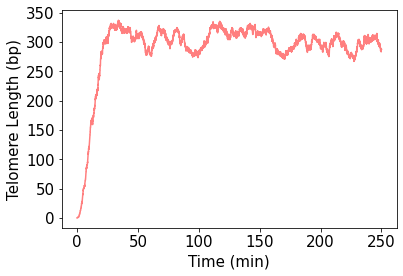

In [59]:
# Stochastic 2D Model

#Function for stochastic simulation of 2D model using Gillespie algorithm.
def TLH_stoc_2d(K0,KS,KD,RIF1_ini,TELO_ini,Omega,KS2,KD2):
    
    #Parameters
    k0 = K0
    ks1 = KS
    kd1 = KD
    ks2 = KS2
    kd2 = KD2
    #Initial condition
    Rif1 = RIF1_ini
    Telo = TELO_ini
    #Empty list
    time = []
    mol_Rif1  = []
    mol_Telo = []
    # Time
    T = 250
    t = 0
    #Omega Propensity
    V = Omega
    #Iterate till time T    
    while t<T:
        #Reaction rates for Gillespie algorithm
        rates = [k0*V,ks1*Telo, kd1*Rif1, ks2*V,kd2*Telo*Rif1/V]
        rate_sum = sum(rates)
        #Generate time points
        tau = -np.log(np.random.uniform(0,1))/rate_sum
        t+=tau     #time point of next event
        r = np.random.rand()*rate_sum     # reaction selection

        # Rif1 Production
        if (r>0 and r<rates[0]):
            Rif1 +=1
        elif(r>rates[0] and r<sum(rates[0:2])):
            Rif1 +=1
        # Rif1 Degradation
        elif(r>rates[1] and r<sum(rates[0:3])):
            Rif1 -=1
        # Telo Production
        elif(r>rates[2] and r<sum(rates[0:4])):
            Telo +=1            
            # Telo degradation
        elif(r>rates[3] and r<sum(rates)):
            Telo -=1
        #Store at each time point.
        time.append(t)
        mol_Rif1.append(Rif1/V*18)
        mol_Telo.append(Telo/V)
    return mol_Rif1,mol_Telo,time

#values
Omega = 20

#Original parameters
K0 = 0.02
KS = 0.11
KD = 0.08
KS2 = 2
KD2 = 0.01

#Parameters 20x
# K0 = 0.2
# KS = 0.11
# KD = 0.08
# KS2 = 20
# KD2 = 0.001

#Call stochastic 2D function
rif1_2d,telo_2d,time_2d = TLH_stoc_2d(K0,KS,KD,0,0,Omega,KS2,KD2)
#Plot
plt.plot(time_2d,rif1_2d,'-r',alpha=0.5)
#plt.plot(time_2d,telo_2d,'-b',alpha=0.5)
#plt.title('2D Model Stochastic')
plt.xlabel('Time (min)',fontsize='15')
plt.ylabel('Telomere Length (bp)',fontsize='15')
#plt.plot(t,z_2d[:,0],'-r',label='Rif1') #~18-25')
#plt.plot(t,z_2d[:,1],'-b',label='Telomerase') #~16-20')
plt.xticks(fontsize='15')
plt.yticks(fontsize='15')
#plt.legend(fontsize='15')
plt.show()

### Modified parameters

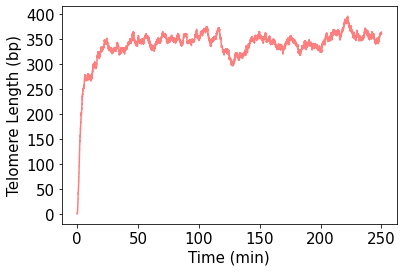

In [60]:
#Modifying Parameters by 20x
K0 = 0.4
KS = 0.11
KD = 0.08
KS2 = 40
KD2 = 0.2

#Stoc
rif1_2d,telo_2d,time_2d = TLH_stoc_2d(K0,KS,KD,0,0,Omega,KS2,KD2)
#Plot
plt.plot(time_2d,rif1_2d,'-r',alpha=0.5)
#plt.plot(time_2d,telo_2d,'-b',alpha=0.5)
#plt.title('2D Model Stochastic')
plt.xlabel('Time (min)',fontsize='15')
plt.ylabel('Telomere Length (bp)',fontsize='15')
#plt.plot(t,z_2d[:,0],'-r',label='Rif1') #~18-25')
#plt.plot(t,z_2d[:,1],'-b',label='Telomerase') #~16-20')
plt.xticks(fontsize='15')
plt.yticks(fontsize='15')
#plt.legend(fontsize='15')
plt.show()

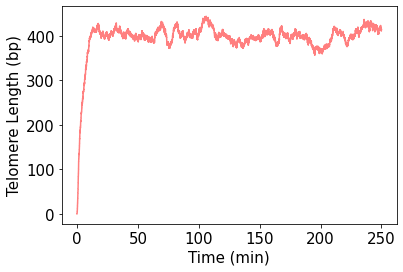

In [61]:
#Parameters modified by 40x
K0 = 0.8
KS = 0.11
KD = 0.08
KS2 = 80
KD2 = 0.4

#Stoc
rif1_2d,telo_2d,time_2d = TLH_stoc_2d(K0,KS,KD,0,0,Omega,KS2,KD2)
#Plot
plt.plot(time_2d,rif1_2d,'-r',alpha=0.5)
#plt.plot(time_2d,telo_2d,'-b',alpha=0.5)
#plt.title('2D Model Stochastic')
plt.xlabel('Time (min)',fontsize='15')
plt.ylabel('Telomere Length (bp)',fontsize='15')
#plt.plot(t,z_2d[:,0],'-r',label='Rif1') #~18-25')
#plt.plot(t,z_2d[:,1],'-b',label='Telomerase') #~16-20')
plt.xticks(fontsize='15')
plt.yticks(fontsize='15')
#plt.legend(fontsize='15')
plt.show()

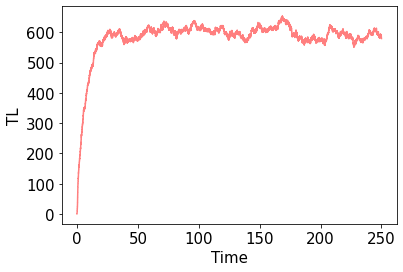

In [364]:
#Parameters 100x
K0 = 2
KS = 0.11
KD = 0.08
KS2 = 200
KD2 = 1

#Stoc
rif1_2d,telo_2d,time_2d = TLH_stoc_2d(K0,KS,KD,0,0,Omega,KS2,KD2)
#Plot
plt.plot(time_2d,rif1_2d,'-r',alpha=0.5)
#plt.plot(time_2d,telo_2d,'-b',alpha=0.5)
#plt.title('2D Model Stochastic')
plt.xlabel('Time (min)',fontsize='15')
plt.ylabel('Telomere Length (bp)',fontsize='15')
#plt.plot(t,z_2d[:,0],'-r',label='Rif1') #~18-25')
#plt.plot(t,z_2d[:,1],'-b',label='Telomerase') #~16-20')
plt.xticks(fontsize='15')
plt.yticks(fontsize='15')
#plt.legend(fontsize='15')
plt.show()

#### By varying paramters proportionally, keeping Omega constant shifts TL to a higher value.

In [ ]:
## Stochastic simulation for 100

In [ ]:
Rif_2dm = []
Time_d_2dm = []
for i in range(100): # Change for 1000 iterations
    rif1_2d,telo_2d,time_2d = TLH_stoc_2d(K0,KS,KD,0,0,Omega,2,0.01)
    # Store last transient from simulation
    Rif_2dm.append(rif1_2d[-1])

In [ ]:
#for V = 500 or v = 400

### 2.D. Stochastic model modified to capture TL for 5 division (at each 120 min time step)

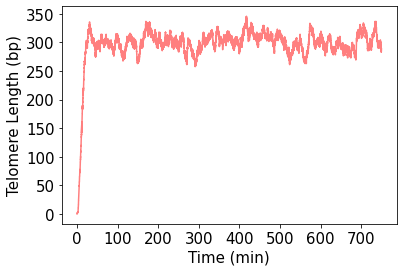

In [62]:
# Stochastic 2D Model
def TLH_stoc_2d(KS,KD,RIF1_ini,TELO_ini,Time):
    
    #params
    k0 = 0.02
    ks1 = KS
    kd1 = KD
    ks2 = 2
    kd2 = 0.01
    #Initial condition
    Rif1 = RIF1_ini
    Telo = TELO_ini
    #Empty list
    time = []
    mol_Rif1  = []
    mol_Telo = []
    loss_pd = []
    loss_pd.append(Rif1)
    #Time
    T = Time
    t = 0
    #Omega
    V = 20
    #Store values between each divisions
    mol_div_1 = []
    mol_div_2 = []
    mol_div_3 = []    
    mol_div_4 = []
    mol_div_5 = []
    # Store mean TL value
    div_avg = []
    
    while t<T:
        
        rates = [k0*V,ks1*Telo, kd1*Rif1, ks2*V,kd2*Telo*Rif1/V]
        rate_sum = sum(rates)
        tau = -np.log(np.random.uniform(0,1))/rate_sum
        t+=tau     #time point of next event
        r = np.random.rand()*rate_sum     # rxn selection

        # Rif1 Production
        if (r>0 and r<rates[0]):
            Rif1 +=1
        elif(r>rates[0] and r<sum(rates[0:2])):
            Rif1 +=1
        # Rif1 Degradation
        elif(r>rates[1] and r<sum(rates[0:3])):
            Rif1 -=1
        # Telo Production
        elif(r>rates[2] and r<sum(rates[0:4])):
            Telo +=1            
            # Telo degradation
        elif(r>rates[3] and r<sum(rates)):
            Telo -=1
        # First division
        if(t>120 and t<240):
            mol_div_1.append(Rif1/V*18)
        # Second division
        elif(t>240 and t<360):
            mol_div_2.append(Rif1/V*18)
        # Third division    
        elif(t>360 and t<480):
            mol_div_3.append(Rif1/V*18)
        # Fourth division
        elif(t>480 and t<600):
            mol_div_4.append(Rif1/V*18)
        # Fifth division
        elif(t>600 and t<720):
            mol_div_5.append(Rif1/V*18)
        
        time.append(t)
        mol_Rif1.append(Rif1/V*18)
        mol_Telo.append(Telo/V*18)
    
    #print(len(mol_div_1),'Mean:',np.mean(mol_div_1),'Std:',np.std(mol_div_1),'Var:',np.var(mol_div_1))
    md1_mu_sig = round(np.mean(mol_div_1),2),round(np.std(mol_div_1),2)
    md2_mu_sig = round(np.mean(mol_div_2),2),round(np.std(mol_div_2),2)
    md3_mu_sig = round(np.mean(mol_div_3),2),round(np.std(mol_div_3),2)
    md4_mu_sig = round(np.mean(mol_div_4),2),round(np.std(mol_div_4),2)
    md5_mu_sig = round(np.mean(mol_div_5),2),round(np.std(mol_div_5),2)
    div_avg = np.array([md1_mu_sig,md2_mu_sig,md3_mu_sig,md4_mu_sig,md5_mu_sig])
    #print(div_avg)

    return mol_Rif1,mol_Telo,time,div_avg

#Plot
rif1_2d,telo_2d,time_2d,div_avg_2d = TLH_stoc_2d(0.11,0.08,0,0,750)
plt.plot(time_2d,rif1_2d,'-r',alpha=0.5)
#plt.plot(time_2d,telo_2d,'-b',alpha=0.5)
#plt.title('2D Model Stochastic')
plt.xlabel('Time (min)',fontsize='15')
plt.ylabel('Telomere Length (bp)',fontsize='15')

plt.xticks(fontsize='15')
plt.yticks(fontsize='15')
#plt.legend(fontsize='15')
plt.show()

### 2.E Variable Degradation rate (kd1)

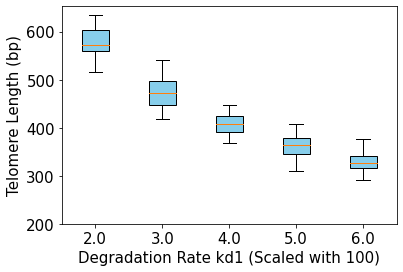

In [51]:
# Use stochastic 2D model without modification to run this cell. 
# Execute that function in the cell above once before running this.

ks = 0.1 # Fixed ks
# Vary kd for five times
for kd in np.arange(0.02,0.07,0.01):
    Rif_d_2dm = []
    #Iterate 50 times for each kd
    for i in range(50):
        RIF,TELO,TIM = TLH_stoc_2d(ks,kd)
        Rif_d_2dm.append(RIF[-1])
    TL_arr = []
    for i in Rif_d_2dm:
        TL_arr.append(i*18)
    #Plot boxplot TL distribution
    bp1 = plt.boxplot(TL_arr,positions=[round(kd*100,1)],showfliers=False,widths=(0.4),patch_artist=True)
    # Different colors for boxplot
    colors = ['skyblue', 'lightgreen']
    for patch, color in zip(bp1['boxes'], colors):
        patch.set_facecolor(color)
#Plot        
plt.xlabel('Degradation Rate kd1 (Scaled with 100)' ,fontsize=15)
plt.ylabel('Telomere Length (bp)',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks([200,300,400,500,600],fontsize=15)
#plt.legend([bp1["boxes"][0], bp2["boxes"][0]], ['Telo=5','Telo=30'], loc='upper right',fontsize=15)
plt.show()

### 2.F Variable Telomerase Processivity (ks1)

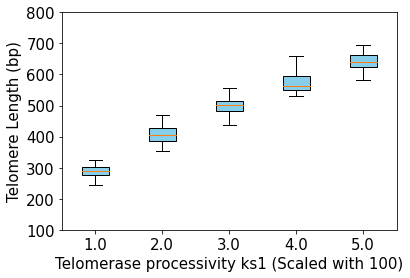

In [52]:
# Use stochastic 2D model without modifications to run this cell. 
# Execute that function in the cell above once before running this.

kd = 0.08 # Fixed kd
#Vary ks for five times
for ks in np.arange(0.1,0.6,0.1):
    Rif_d_2dm = []
    #Iterate 50 times
    for i in range(50):
        RIF,TELO,TIM = TLH_stoc_2d(ks,kd)
        Rif_d_2dm.append(RIF[-1])
    TL_arr = []
    for i in Rif_d_2dm:
        TL_arr.append(i*18)
    #Plot TL distribution boxplot for each ks
    bp1 = plt.boxplot(TL_arr,positions=[round(ks*10,1)],showfliers=False,widths=(0.4),patch_artist=True)
    #Colors for boxplot
    colors = ['skyblue', 'lightgreen']
    for patch, color in zip(bp1['boxes'], colors):
        patch.set_facecolor(color)
#Plot        
plt.xlabel('Telomerase processivity ks1 (Scaled with 100)' ,fontsize=15)
plt.ylabel('Telomere Length (bp)',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks([100,200,300,400,500,600,700,800],fontsize=15)
#plt.legend([bp1["boxes"][0], bp2["boxes"][0]], ['Telo=5','Telo=30'], loc='upper right',fontsize=15)
plt.show()

### 2.G. Elongation of Telomeres over five cell divisions

C:\Users\Ghanendra\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\Ghanendra\Anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\Ghanendra\Anaconda3\lib\site-packages\numpy\core\_methods.py:234: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\Users\Ghanendra\Anaconda3\lib\site-packages\numpy\core\_methods.py:195: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
C:\Users\Ghanendra\Anaconda3\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


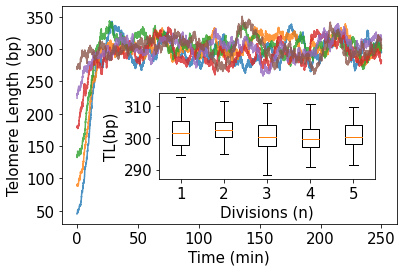

In [502]:
#Plot six Telomeres starting below 350 bp initial length for 2 divisions (240 min)
for Rif_ic in range(50,350,50):
    # Stochastic 2D TLH simulation
    rif1_2d,telo_2d,time_2d,div_2d = TLH_stoc_2d(0.11,0.08,Rif_ic,Rif_ic,250)
    plt.plot(time_2d,rif1_2d,alpha=0.8)

#Plot 30 telomeres starting below 350 bp initial length for five division (720 min)
#Ignore first division till 120 min because of transients
div_2dm = []
for Rif_ic in range(50,350,10):
    # Stochastic 2D TLH simulation
    rif1_2d,telo_2d,time_2d,div_2d = TLH_stoc_2d(0.11,0.08,Rif_ic,Rif_ic,750)
    div_2dm.append(div_2d)
plt.xlabel('Time (min)',fontsize='15')
plt.ylabel('Telomere Length (bp)',fontsize='15')
plt.xticks(fontsize='15')
plt.yticks(fontsize='15')

div_arr = np.array(div_2dm)
#print(div_arr)
#Mean
div_mean_e = np.mean(div_arr,axis=0)

# Each division empty array
div_1 = np.zeros([30,2])
div_2 = np.zeros([30,2])
div_3 = np.zeros([30,2])
div_4 = np.zeros([30,2])
div_5 = np.zeros([30,2])

#For each division store mean TL value.
for i in range(30):
    div_1[i] = div_arr[i][0]
    div_2[i] = div_arr[i][1]
    div_3[i] = div_arr[i][2]
    div_4[i] = div_arr[i][3]
    div_5[i] = div_arr[i][4]

# Store TL at each division for 30 iterations
division_arr = [div_1.T,div_2.T,div_3.T,div_4.T,div_5.T]
DIV = [div_1.T[0],div_2.T[0],div_3.T[0],div_4.T[0],div_5.T[0]]
np.mean(division_arr[0],axis=1)

DIV = [div_1.T[0],div_2.T[0],div_3.T[0],div_4.T[0],div_5.T[0]]
plt.axes([.35, .28, .5, .3])
plt.boxplot(DIV,showfliers=False,widths=(0.4))
plt.xlabel('Divisions (n)',fontsize = 15)
plt.ylabel('TL(bp)',fontsize = 15)
#plt.yticks([250,300,350,400],fontsize=15)
plt.yticks([290,300,310],fontsize=15)
plt.xticks(fontsize=15)

plt.show()


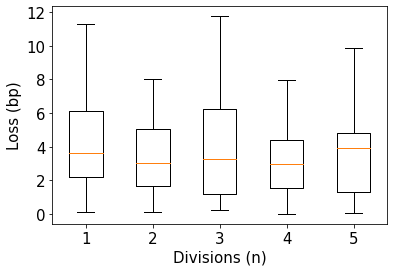

In [503]:
# Loss at each division after 120 minutes
#Absolute difference between TL and 300 bp (equilibrium TL)
loss_d1 = np.abs(np.subtract(div_1.T[0],300)) #Division 1
loss_d2 = np.abs(np.subtract(div_2.T[0],300)) # Division 2
loss_d3 = np.abs(np.subtract(div_3.T[0],300)) # Division 3
loss_d4 = np.abs(np.subtract(div_4.T[0],300)) # Division 4
loss_d5 = np.abs(np.subtract(div_5.T[0],300)) # Division 5
# Loss during shortening.
LOSS_S = [loss_d1,loss_d2,loss_d3,loss_d4,loss_d5]

#Plot
plt.boxplot(LOSS_S,showfliers=False)
plt.xlabel('Divisions (n)',fontsize = 15)
plt.ylabel('Loss (bp)',fontsize = 15)
#plt.yticks([250,300,350,400],fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)

plt.show()


### 2.H. Shortening of Telomeres over five cell divisions.

C:\Users\Ghanendra\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\Ghanendra\Anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\Ghanendra\Anaconda3\lib\site-packages\numpy\core\_methods.py:234: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\Users\Ghanendra\Anaconda3\lib\site-packages\numpy\core\_methods.py:195: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
C:\Users\Ghanendra\Anaconda3\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


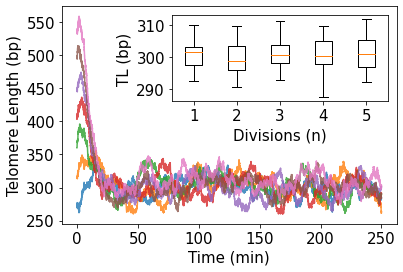

In [504]:
#Plot six Telomeres starting below 350 bp initial length for 2 divisions (240 min)
for Rif_ic in range(300,650,50):

    rif1_2d,telo_2d,time_2d,div_2d = TLH_stoc_2d(0.11,0.08,Rif_ic,Rif_ic,250)
    plt.plot(time_2d,rif1_2d,alpha=0.8)

div_2dm = []
#Plot 30 telomeres starting above 350 bp initial length for five division (720 min)
#Ignore first division till 120 min because of transients
for Rif_ic in range(50,350,10):

    rif1_2d,telo_2d,time_2d,div_2d = TLH_stoc_2d(0.11,0.08,Rif_ic,Rif_ic,750)
    div_2dm.append(div_2d)
plt.xlabel('Time (min)',fontsize='15')
plt.ylabel('Telomere Length (bp)',fontsize='15')
plt.xticks(fontsize='15')
plt.yticks(fontsize='15')

div_arr = np.array(div_2dm)
#print(div_arr)
div_mean_e = np.mean(div_arr,axis=0)

# Each division
div_1 = np.zeros([30,2])
div_2 = np.zeros([30,2])
div_3 = np.zeros([30,2])
div_4 = np.zeros([30,2])
div_5 = np.zeros([30,2])

#For each division store mean TL value.
for i in range(30):
    div_1[i] = div_arr[i][0]
    div_2[i] = div_arr[i][1]
    div_3[i] = div_arr[i][2]
    div_4[i] = div_arr[i][3]
    div_5[i] = div_arr[i][4]

# Store TL at each division for 30 iterations
division_arr = [div_1.T,div_2.T,div_3.T,div_4.T,div_5.T]
DIV = [div_1.T[0],div_2.T[0],div_3.T[0],div_4.T[0],div_5.T[0]]
np.mean(division_arr[0],axis=1)

#Plot
DIV = [div_1.T[0],div_2.T[0],div_3.T[0],div_4.T[0],div_5.T[0]]
#plt.axes([.35, .28, .5, .3])
plt.axes([.38, .55, .5, .3])
plt.boxplot(DIV,showfliers=False,widths=(0.4))
plt.xlabel('Divisions (n)',fontsize = 15)
plt.ylabel('TL (bp)',fontsize = 15)
plt.yticks([290,300,310],fontsize=15)
plt.xticks(fontsize=15)

plt.show()


### 2.I. Loss of base pairs during elongation and shortening.

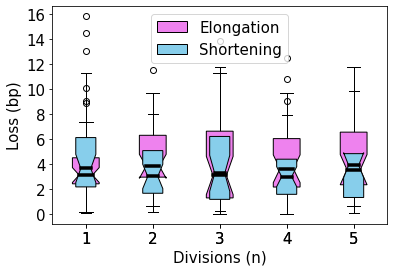

In [510]:
# Loss at each division after 120 minutes
#Absolute difference between TL and 300 bp (equilibrium TL)
loss_d1 = np.abs(np.subtract(div_1.T[0],300)) # division 1
loss_d2 = np.abs(np.subtract(div_2.T[0],300)) # division 2
loss_d3 = np.abs(np.subtract(div_3.T[0],300)) # division 3
loss_d4 = np.abs(np.subtract(div_4.T[0],300)) # division 4
loss_d5 = np.abs(np.subtract(div_5.T[0],300)) # division 5
# Loss during elongation
LOSS_E = [loss_d1,loss_d2,loss_d3,loss_d4,loss_d5]

#Plot loss during elongation
medianprops = dict(linestyle='-', linewidth=3.5, color='black')
bp1 = plt.boxplot(LOSS_E,showfliers=True,patch_artist=True,widths=(0.4),notch = True,medianprops=medianprops)
plt.xlabel('Divisions (n)',fontsize = 15)
plt.ylabel('Loss (bp)',fontsize = 15)
#plt.yticks([250,300,350,400],fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)

colors = ['violet','violet','violet','violet','violet']
for patch, color in zip(bp1['boxes'], colors):
    patch.set_facecolor(color)

#Plot loss during shortening
medianprops = dict(linestyle='-', linewidth=3.5, color='black')
bp2 = plt.boxplot(LOSS_S,showfliers=True, patch_artist=True,widths=(0.3),notch=True,medianprops=medianprops)
plt.xlabel('Divisions (n)',fontsize = 15)
plt.ylabel('Loss (bp)',fontsize = 15)
#plt.yticks([250,300,350,400],fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)

colors = ['skyblue','skyblue','skyblue','skyblue','skyblue']
for patch, color in zip(bp2['boxes'], colors):
        patch.set_facecolor(color)

plt.legend([bp1["boxes"][0], bp2["boxes"][0]], ['Elongation','Shortening'], loc='upper center',fontsize=15)        

plt.show()

In [ ]:
## Code can run for 15-20 minutes.

### 2C. TL Distribution

In [215]:
### TL distribution

# Use stochastic 2D model without modifications to run this cell. 
# Execute that function in the cell above once before running this.

Rif_2dm = []
Time_d_2dm = []
# Iterate for 1000 times.
for i in range(1000): #Reduce time step to 100 for quick simulation to test.
    rif1_2d,telo_2d,time_2d = TLH_stoc_2d(K0,KS,KD,0,0,Omega,2,0.01)
    Rif_2dm.append(rif1_2d[-1])

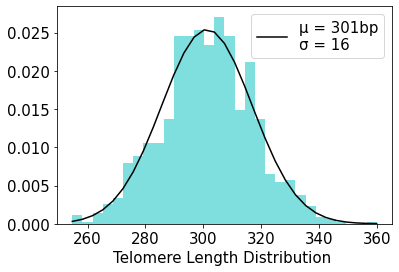

In [244]:
_, bins, _ = plt.hist(Rif_2dm, 30, density=1, alpha=0.5,color='c')
mu, sigma = st.norm.fit(Rif_2dm)
best_fit_line = st.norm.pdf(bins, mu, sigma)
plt.plot(bins, best_fit_line,'-k',label='μ = %0.0fbp\nσ = %0.0f'%(mu,sigma))
#plt.title('Distribution of TL for Telo=0')
plt.xlabel('Telomere Length Distribution ',fontsize=15)
plt.legend(fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
#plt.xlim([0,600])
#plt.ylabel('Count')
plt.show()

## 3D Model: Extension of 2D model by adding Tel1 kinase

### 3.A. Circuit Diagram

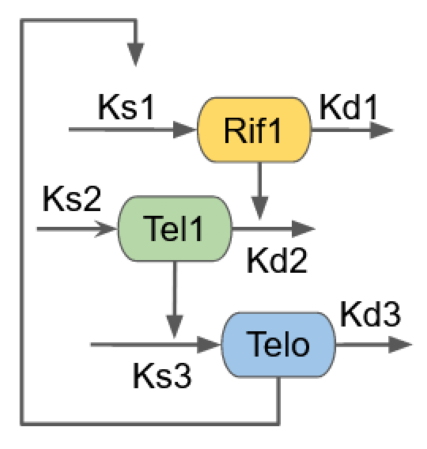

In [45]:
img = mpimg.imread('TLH/3d_ckt_m2.PNG')
plt.figure(figsize=(8,8))
plt.axis('off')
imgplot = plt.imshow(img)

### 3.B. Deterministic

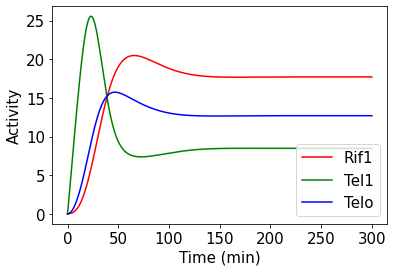

In [66]:
#Deterministic

# Function for 3D model
def TLH_3d(x,t):
    Rif1 = x[0]
    Tel1 = x[1]
    Telo = x[2]
    # System of ODEs for 3D model
    dRif1dt = k0 + ks1*Telo - kd1*Rif1
    dTel1dt = ks2 - kd2*Tel1*Rif1
    dTelodt = ks3*Tel1 - kd3*Telo

    return dRif1dt, dTel1dt, dTelodt
    
#Parameters
k0 = 0.02
ks1 = 0.11
kd1 = 0.08
ks2 = 1.5
kd2 = 0.01
ks3 = 0.03
kd3 = 0.02
#Initial conditions
init = [0,0,0]
#Time
t = np.linspace(0,300,1000)
#ODE
z = odeint(TLH_3d,init,t)
plt.plot(t,z[:,0],'r',label='Rif1')
plt.plot(t,z[:,1],'g',label='Tel1')
plt.plot(t,z[:,2],'b',label='Telo')
plt.legend(loc='lower right',fontsize ='15')
plt.xlabel('Time (min)',fontsize ='15')
plt.ylabel('Activity',fontsize ='15')
plt.xticks(fontsize ='15')
plt.yticks(fontsize = '15')
plt.show()

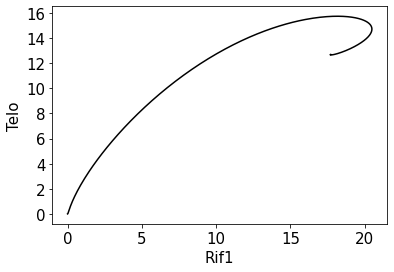

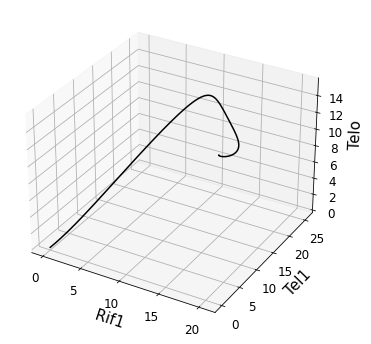

In [48]:
#Plot limit cycle.

fig = plt.figure(figsize=(6,6))
ax = plt.axes(projection='3d')
#ax = fig.add_subplot(111, projection='3d')
ax.plot3D(z[:,0],z[:,1],z[:,2],'k')
#plt.title('Cell cycle 3D Model Limit Cycle')
ax.set_xlabel('  Rif1',fontsize='15')
ax.set_ylabel('   Tel1',fontsize='15')
ax.set_zlabel('   Telo',fontsize='15')
#ax.set_xlim([0,1])
#ax.set_ylim([0,1])
#ax.set_zlim([0,1])
ax.tick_params(axis='both', which='major', labelsize=12)
plt.show()

### 3.B Stochastic 

In [70]:
# 3D Model Stochastic simulation

#Function for stochastic simulation of 3D model
def TLH_3d_stoc(V_val,KS1,KD1,RIF1_i):
    
    #Parameters

    k0 = 0.02
    ks1 = KS1
    kd1 = KD1
    ks2 = 1.5
    kd2 = 0.01
    ks3 = 0.03
    kd3 = 0.02
    #Initial
    Rif1 = RIF1_i
    Tel1 = 0.0
    Telo = 0.0
    # Propensity factor
    V = 20
    # Empty List
    time = []
    mol_Rif1  = []
    mol_Tel1  = []
    mol_Telo  = []
    #Time
    T = 300
    t = 0    
    #Loop until T
    while t<T:
        #rated for Gillespie simulation
        rates = [k0*V,ks1*Telo, kd1*Rif1,
                 ks2*V, kd2*Tel1*Rif1/V,
                 ks3*Tel1, kd3*Telo,
                ]
        
        rate_sum = sum(rates)
        #Genetate next time step randomly
        tau = -np.log(np.random.uniform(0,1))/rate_sum
        t+=tau     #time point of next event
        r = np.random.rand()*rate_sum     # rxn selection

        # Rif1 Production
        if (r>0 and r<rates[0]):
            Rif1 +=1
        # Rif1 Degradation
        elif(r>rates[0] and r<sum(rates[0:2])):
            Rif1 +=1
        elif(r>rates[1] and r<sum(rates[0:3])):
            Rif1 -=1
        elif(r>rates[2] and r<sum(rates[0:4])):
            Tel1 +=1
        elif(r>rates[3] and r<sum(rates[0:5])):
            Tel1 -=1
        elif(r>rates[4] and r<sum(rates[0:6])):
            Telo +=1
        elif(r>rates[5] and r<sum(rates)):
            Telo -=1
        #Store data
        time.append(t)
        #Multiply with 18 to get TL.
        mol_Rif1.append(Rif1/V) # *18
        mol_Tel1.append(Tel1/V) # *18
        mol_Telo.append(Telo/V) # *18
    return mol_Rif1,mol_Tel1,mol_Telo,time

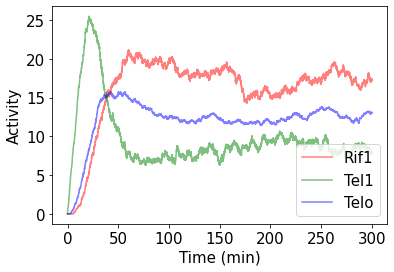

In [71]:
#z = odeint(TLH_3d,init,t)
#plt.plot(t,z[:,0],'r',label='Rif1')
#plt.plot(t,z[:,1],'g',label='Tel1')
#plt.plot(t,z[:,2],'b',label='Telo')

#Call 3D stochastic function
RIF,TEL1,TELO,TD=TLH_3d_stoc(20,0.11,0.08,0)

#Plot.
plt.plot(TD,RIF,'r',label='Rif1',alpha=0.5)
plt.plot(TD,TEL1,'g',label='Tel1',alpha=0.5)
plt.plot(TD,TELO,'b',label='Telo',alpha=0.5)
plt.legend(loc='lower right',fontsize=15)
#plt.title('Fig 3D Model Stochastic Simulation')
plt.xlabel('Time (min)',fontsize=15)
plt.ylabel('Activity',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

### 3.C TL distribution

In [5]:
# TL distribution
# Simulation can take time, be patient.
Rif_3dm = []
Time_3dm = []
# Iterate for 1000 time steps.
for i in range(1000):
    rif1_3d,tel1_3d,telo_3d,time_3d = TLH_3d_stoc(20,0.11,0.08)
    Rif_3dm.append(rif1_3d[-1])

### 3.D Histogram Plot

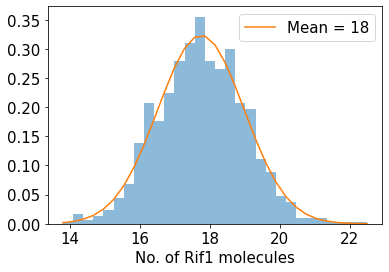

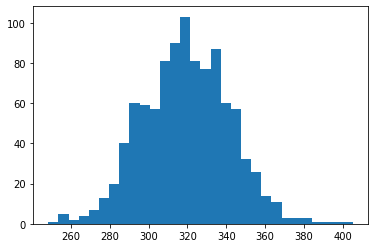

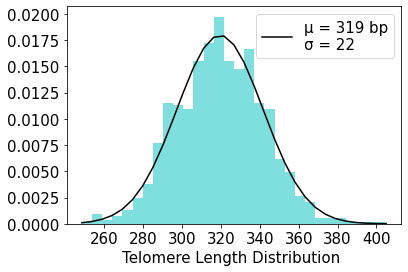

In [19]:
_, bins, _ = plt.hist(Rif_3dm, 30, density=1, alpha=0.5)
# Mean and standard deviation
mu, sigma = st.norm.fit(Rif_3dm)
best_fit_line = st.norm.pdf(bins, mu, sigma)
plt.plot(bins, best_fit_line,label='Mean = %d'%round(mu))
#plt.title('Histogram of Rif1 conc.')
plt.xlabel('No. of Rif1 molecules', fontsize=15)
plt.legend(fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

#Convert Rif1 conc. into Telomere Length
TL_arr = []
for i in Rif_3dm:
    TL_arr.append(i*18)
plt.hist(TL_arr,30)
plt.show()

_, bins, _ = plt.hist(TL_arr, 30, density=1, alpha=0.5,color='c')
# Mean and standard deviations
mu, sigma = st.norm.fit(TL_arr)
best_fit_line = st.norm.pdf(bins, mu, sigma)
plt.plot(bins, best_fit_line,'-k',label='μ = %0.0f bp\nσ = %0.0f'%(mu,sigma))
#plt.title('Distribution of TL for Telo=0')
plt.xlabel('Telomere Length Distribution ',fontsize=15)
plt.legend(fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
#plt.xlim([0,600])
#plt.ylabel('Count')
plt.show()

### 3.E Variable degradation rate (kd1)

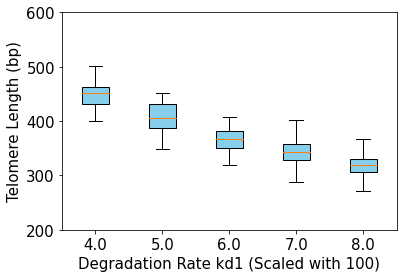

In [36]:
# Same as in 2D model
ks = 0.11
for kd in np.arange(0.04,0.09,0.01):
    Rif_d_3dm = []
    for i in range(50):
        RIF,TEL1,TELO,TIM = TLH_3d_stoc(0,ks,kd)
        Rif_d_3dm.append(RIF[-1])
    TL_arr = []
    for i in Rif_d_3dm:
        TL_arr.append(i*18)
    bp1 = plt.boxplot(TL_arr,positions=[round(kd*100,1)],showfliers=False,widths=(0.4),patch_artist=True)

    colors = ['skyblue', 'lightgreen']
    for patch, color in zip(bp1['boxes'], colors):
        patch.set_facecolor(color)
        
plt.xlabel('Degradation Rate kd1 (Scaled with 100)' ,fontsize=15)
plt.ylabel('Telomere Length (bp)',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks([200,300,400,500,600],fontsize=15)
#plt.legend([bp1["boxes"][0], bp2["boxes"][0]], ['Telo=5','Telo=30'], loc='upper right',fontsize=15)
plt.show()

### 3.F Variable Telomerase Processivity (ks1)

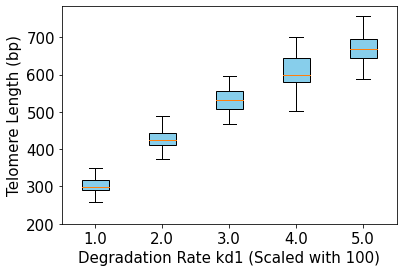

In [38]:
# Same as in 2D model
kd = 0.08
for ks in np.arange(0.1,0.6,0.1):
    Rif_d_3dm = []
    for i in range(50):
        RIF,TEL1,TELO,TIM = TLH_3d_stoc(0,ks,kd)
        Rif_d_3dm.append(RIF[-1])
    TL_arr = []
    for i in Rif_d_3dm:
        TL_arr.append(i*18)
    bp1 = plt.boxplot(TL_arr,positions=[round(ks*10,1)],showfliers=False,widths=(0.4),patch_artist=True)

    colors = ['skyblue', 'lightgreen']
    for patch, color in zip(bp1['boxes'], colors):
        patch.set_facecolor(color)
        
plt.xlabel('Degradation Rate kd1 (Scaled with 100)' ,fontsize=15)
plt.ylabel('Telomere Length (bp)',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks([200,300,400,500,600,700],fontsize=15)
#plt.legend([bp1["boxes"][0], bp2["boxes"][0]], ['Telo=5','Telo=30'], loc='upper right',fontsize=15)
plt.show()

## 4D Model with Telomere Length Oscillations

### 4.A. Circuit Diagram

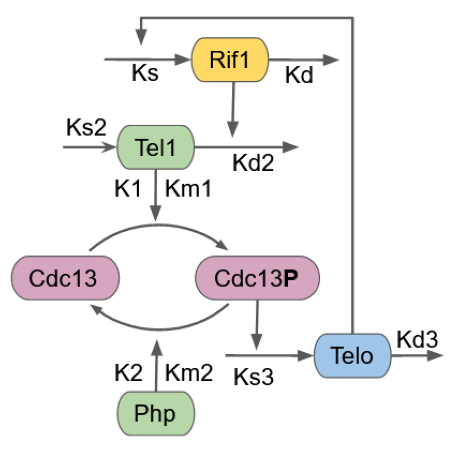

In [46]:
img = mpimg.imread('TLH/4d_ckt.PNG')
plt.figure(figsize=(8,8))
plt.axis('off')
imgplot = plt.imshow(img)

### 4.B Deterministic

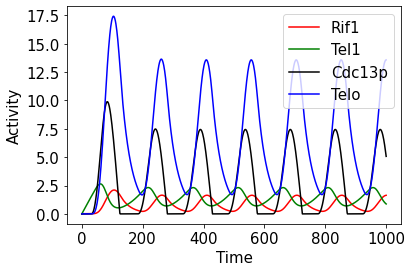

In [205]:
# Deterministic 4d Model
def TLH_4d(x,t):
    Rif1 = x[0]
    Tel1 = x[1]
    Cdc13p = x[2]
    Telo = x[3]
    dRif1dt = k0 + ks1*Telo - kd1*Rif1
    dTel1dt = ks2 - kd2*Tel1*Rif1
    dCdc13pdt = k1*Tel1*(Cdc13T - Cdc13p)**n/(Km1**n + (Cdc13T - Cdc13p)**n) - k2*Phy*Cdc13p**n/(Km2**n + Cdc13p**n)
    dTelodt = Cdc13p*ks3 - kd3*Telo
    return dRif1dt, dTel1dt, dCdc13pdt, dTelodt
    
#Parameters
k0 = 0.01
ks1 = 0.06  # keep ks1 as 0.5 so that the factor can be varies between (0 to 10) or (0 to 1)
kd1 = 0.5
ks2 = 0.05
kd2 = 0.05
ks3 = 0.08
kd3 = 0.03
kT = 0.0

k1 = 0.3
k2 = 0.06
Km1 = 0.002
Km2 = 0.002
#Hill coefficient
n = 3

Phy = 8
Cdc13T = 10

#Initial
init = [0,0,0,0]
#Time
t = linspace(0,1000,1000)
# Integrate ODEs
z = odeint(TLH_4d,init,t)

#Plot
plt.plot(t,z[:,0],'r',label='Rif1')
plt.plot(t,z[:,1],'g',label='Tel1')
plt.plot(t,z[:,2],'k',label='Cdc13p')
plt.plot(t,z[:,3],'b',label='Telo')

plt.legend(loc='upper right',fontsize='15')
#plt.title('Fig 3. TLH 4D')
plt.xlabel('Time',fontsize='15')
plt.ylabel('Activity',fontsize='15')
plt.xticks(fontsize='15')
plt.yticks(fontsize='15')
plt.show()

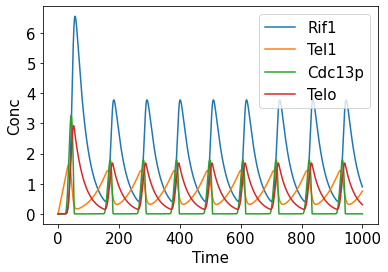

In [456]:
# Deterministic 4d Model
def TLH_4d(x,t):
    Rif1 = x[0]
    Tel1 = x[1]
    Cdc13p = x[2]
    Telo = x[3]
    dRif1dt = ks1*Telo - kd1*Rif1
    dTel1dt = ks2 - kd2*Tel1*Rif1
    dCdc13pdt = k1*Tel1*(Cdc13T - Cdc13p)**n/(Km1**n + (Cdc13T - Cdc13p)**n) - k2*Phy*Cdc13p**n/(Km2**n + Cdc13p**n)
    dTelodt = Cdc13p*ks3 - kd3*Telo
    return dRif1dt, dTel1dt, dCdc13pdt, dTelodt
    
#Parameters
ks1 = 0.5
kd1 = 0.2
ks2 = 0.05
kd2 = 0.05
ks3 = 0.08
kd3 = 0.03
kT = 0.0

k1 = 0.6
k2 = 0.09
Km1 = 0.002
Km2 = 0.002
#Hill coefficient
n = 3

Phy = 8
Cdc13T = 10

init = [0,0,0,0]
t = linspace(0,1000,1000)
z = odeint(TLH_4d,init,t)
plt.plot(t,z[:,0],label='Rif1')
plt.plot(t,z[:,1],label='Tel1')
plt.plot(t,z[:,2],label='Cdc13p')
plt.plot(t,z[:,3],label='Telo')

plt.legend(loc='upper right',fontsize=15)
#plt.title('Fig 3. TLH 4D')
plt.xlabel('Time',fontsize=15)
plt.ylabel('Conc',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

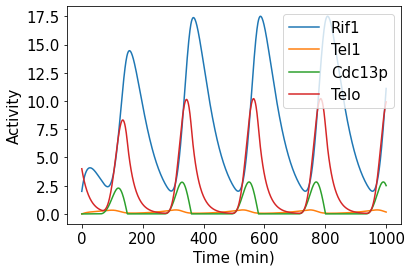

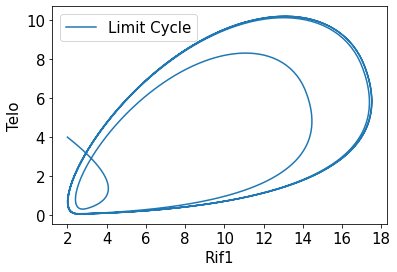

In [77]:
# Deterministic 4d Model
def TLH_4d(x,t):
    Rif1 = x[0]
    Tel1 = x[1]
    Cdc13p = x[2]
    Telo = x[3]
    
    dRif1dt = ks1*Telo - kd1*Rif1
    dTel1dt = ks2 - kd2*Tel1*Rif1
    dCdc13pdt = k1*Tel1*(Cdc13T - Cdc13p)**n/(Km1**n + (Cdc13T - Cdc13p)**n) - k2*Phy*Cdc13p**n/(Km2**n + Cdc13p**n)
    dTelodt = Cdc13p*ks3 - kd3*Telo
    return dRif1dt, dTel1dt, dCdc13pdt, dTelodt
    
#Parameters
ks1 = 0.06  # keep ks1 (0.4 to 0.6) 0.5 so that the factor can be varies between (0 to 10) or (0 to 1)
kd1 = 0.02  # Amplitude
ks2 = 0.01 # Frequency of oscillations
kd2 = 0.01 # Frequency of oscillations
ks3 = 0.2
kd3 = 0.04 

k1 = 0.8
k2 = 0.02
Km1 = 0.002
Km2 = 0.002
#Hill coefficient
n = 3

Phy = 10
Cdc13T = 10

init = [2,0,0,4]
t = np.linspace(0,1000,1000)
z = odeint(TLH_4d,init,t)
plt.plot(t,z[:,0],label='Rif1')
plt.plot(t,z[:,1],label='Tel1')
plt.plot(t,z[:,2],label='Cdc13p')
plt.plot(t,z[:,3],label='Telo')

plt.legend(loc='upper right')
#plt.title('Fig 3. TLH 4D')
plt.xlabel('Time (min)',fontsize=15)
plt.ylabel('Activity',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(loc='upper right',fontsize=15)
plt.show()

plt.plot(z[:,0],z[:,3],label='Limit Cycle')
plt.legend(loc='upper left')
#plt.title('Fig 3. Rif1 vs Telo')
plt.xlabel('Rif1',fontsize=15)
plt.ylabel('Telo',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(loc='upper left',fontsize=15)
plt.show()

### 4.B Stochastic

In [464]:
### Stochastic simulation 4d model

def TLH_stoc_4d_para(V_val,T_val,ks1_para):
    
    #Parameters
    ks1 = 0.06*ks1_para  # keep ks1 as 0.5 so that the factor can be varies between (0 to 10) or (0 to 1)
    kd1 = 0.1
    ks2 = 0.01
    kd2 = 0.01
    ks3 = 0.2
    kd3 = 0.04

    k1 = 0.8
    k2 = 0.02

    Km1 = 0.002
    Km2 = 0.002
    #Hill coefficient
    n = 3

    Phy = 8
    Cdc13T = 10
    
    Rif1 = 0.0
    Tel1 = 0.0
    Cdc13p = 0.0
    Telo = 0.0
    
    V = V_val
        
    time = []
    mol_Rif1  = []
    mol_Tel1  = []
    mol_Cdc13 = []
    mol_Telo  = []
    
    T = T_val
    t = 0
    
    while t<T:
        
        rates = [ks1*Telo, kd1*Rif1,
                 ks2*V, kd2*Tel1*Rif1/V,
                 k1*Tel1*(Cdc13T - Cdc13p)**n/ ((V*Km1)**n + (Cdc13T - Cdc13p)**n), k2*Phy*Cdc13p**n/((V*Km2)**n + Cdc13p**n),
                 Cdc13p*ks3, kd3*Telo
                ]
        
        rate_sum = sum(rates)
        
        tau = -np.log(np.random.uniform(0,1))/rate_sum
        t+=tau     #time point of next event
        r = np.random.rand()*rate_sum     # rxn selection

        # Rif1 Production
        if (r>0 and r<rates[0]):
            Rif1 +=1
        # Rif1 Degradation
        elif(r>rates[0] and r<sum(rates[0:2])):
            Rif1 -=1
        elif(r>rates[1] and r<sum(rates[0:3])):
            Tel1 +=1
        elif(r>rates[2] and r<sum(rates[0:4])):
            Tel1 -=1
        elif(r>rates[3] and r<sum(rates[0:5])):
            Cdc13p +=1
        elif(r>rates[4] and r<sum(rates[0:6])):
            Cdc13p -=1
        elif(r>rates[5] and r<sum(rates[0:7])):
            Telo +=1
        elif(r>rates[6] and r<sum(rates)):
            Telo -=1
            
        time.append(t)
        mol_Rif1.append(Rif1/V)
        mol_Tel1.append(Tel1/V)
        mol_Cdc13.append(Cdc13p/V)
        mol_Telo.append(Telo/V)
    return mol_Rif1,mol_Tel1,mol_Cdc13,mol_Telo,time

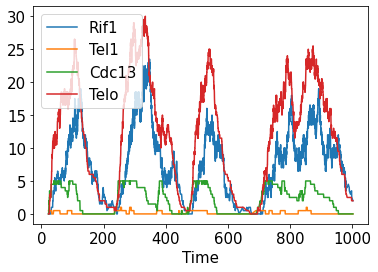

In [469]:
RIF,TEL,CDC13,TELO,TD = TLH_stoc_4d_para(2, 1000,1)
plt.plot(TD,RIF,label='Rif1')
plt.plot(TD,TEL,label='Tel1')
plt.plot(TD,CDC13,label='Cdc13')
plt.plot(TD,TELO,label='Telo')
plt.legend(loc='upper left',fontsize=15)
#plt.title('Stochastic Simulation')
plt.xlabel('Time',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()
#print(np.round(RIF[-1],2))

### 4.C. TL distribution

In [60]:
Rif_d = []
Time_d = []
Telo_d = []
for i in range(1000):
    RIF,TEL,CDC13,TELO,TD = TLH_stoc_4d_para(10, 100,10)
    #plt.plot(TD,RIF,label='Rif1')
    #plt.plot(TD,TEL,label='Tel1')
    #plt.plot(TD,CDC13,label='Cdc13')
    #plt.plot(TD,TELO,label='Telo')
    #plt.legend(loc='upper left')
    #plt.show()
    Rif_d.append(RIF[-1])
    Telo_d.append(TELO[-1])


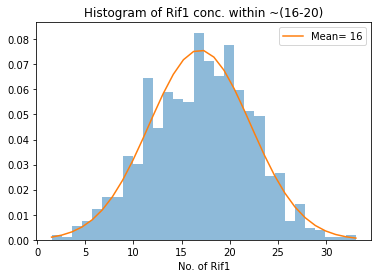

In [62]:
_, bins, _ = plt.hist(Rif_d, 30, density=1, alpha=0.5)
mu, sigma = st.norm.fit(Rif_d)
best_fit_line = st.norm.pdf(bins, mu, sigma)
plt.plot(bins, best_fit_line,label='Mean= %d'%mu)
plt.title('Histogram of Rif1 conc. within ~(16-20)')
plt.xlabel('No. of Rif1')
plt.legend()
#plt.ylabel('Count')
plt.show()

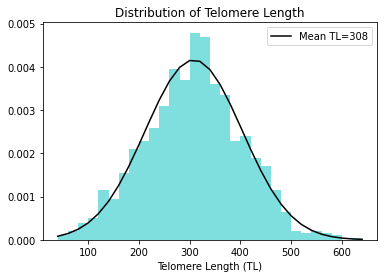

In [212]:
_, bins, _ = plt.hist(TL_arr, 30, density=1, alpha=0.5,color='c')
mu, sigma = st.norm.fit(TL_arr)
best_fit_line = st.norm.pdf(bins, mu, sigma)
plt.plot(bins, best_fit_line,'-k',label='Mean TL=%0.0f'%mu)
plt.title('Distribution of Telomere Length')
plt.xlabel('Telomere Length (TL)')
plt.legend()
#plt.xlim([0,600])
#plt.ylabel('Count')
plt.show()

## 1D model close form solution

In [101]:
import sympy as sp
from sympy.interactive import printing
printing.init_printing(use_latex = True)

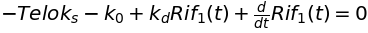

In [102]:
x = sp.Symbol('x')
t,k0,ks,kd,Rif1,Telo = symbols('t k_0 k_s k_d Rif1 Telo')
r = sp.Function('Rif1')(t)
r.diff()

diffeq = Eq(r.diff(t) -k0-ks*Telo + kd*r,0)
display(diffeq)


In [103]:
dsolve(diffeq,r)

## 4.C. Bifurcation plot data 4D model

### kd3 = 0.006

In [104]:
bf_data = pd.read_csv('tlh_4d_bif.dat',sep='\s+',names=['X','Y','Z','P1','P2','P3'])
bf_data.head()

,X,Y,Z,P1,P2,P3
0,0.004000,4.52901,4.52901,2,1,0
1,0.004359,4.48962,4.48962,1,1,0
2,0.004408,4.48470,4.48470,1,1,0
3,0.004458,4.47977,4.47977,1,1,0
4,0.004509,4.47485,4.47485,1,1,0


### Subcritical Hopf bifurcation

(600, 6)
(200, 6)


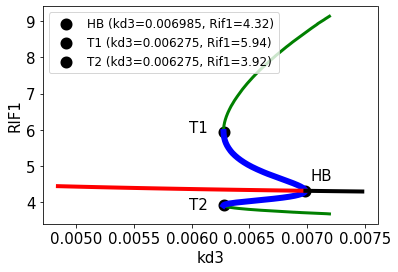

In [105]:
bf = bf_data[bf_data['P2']==2]
print(bf.shape)

plt.plot(bf.X,bf.Y,'g',linewidth=3)
plt.plot(bf.X,bf.Z,'g',linewidth=3)

plt.scatter(bf.X[200],bf.Y[200],color='k',label='HB (kd3=%f, Rif1=%0.2f)'%(bf.X[200],bf.Y[200]),linewidth=6)
plt.text(bf.X[200]+0.00004,bf.Y[200]+0.3,'HB',color='k',fontsize=15)

plt.plot(bf.X.loc[10:405],bf.Y.loc[10:405],'b', linewidth=6)
plt.plot(bf.X.loc[200:405],bf.Z.loc[200:405],'b',linewidth=6)

plt.scatter(bf.X[405],bf.Y[405],color='k',label='T1 (kd3=%f, Rif1=%0.2f)'%(bf.X[405],bf.Y[405]),linewidths=6)
plt.scatter(bf.X[405],bf.Z[405],color='k',label='T2 (kd3=%f, Rif1=%0.2f)'%(bf.X[405],bf.Z[405]),linewidths=6)

plt.text(bf.X[405]-0.0003,bf.Y[405],'T1',color='k',fontsize=15)
plt.text(bf.X[405]-0.0003,bf.Z[405]-0.1,'T2',color='k',fontsize=15)

bf = bf_data[bf_data['P2']==1]
print(bf.shape)
#plt.plot(bf.X,bf.Y,'g',linewidth=4)
plt.plot(bf.X.loc[10:36],bf.Y.loc[10:36],'r',linewidth=4)
plt.plot(bf.X.loc[36:40],bf.Y.loc[36:40],'k',linewidth=4)

#plot params
plt.ylabel('RIF1',fontsize=15)
plt.xlabel('kd3',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(loc='upper left',fontsize=12)
plt.show()


### kd1 =0.003

In [106]:
bf_data_kd1 = pd.read_csv('tlh_4d_kd1.dat',sep='\s+',names=['X','Y','Z','P1','P2','P3'])
bf_data_kd1.head()

,X,Y,Z,P1,P2,P3
0,0.001000,4.52901,4.52901,2,1,0
1,0.001090,4.48954,4.48954,1,1,0
2,0.001095,4.48757,4.48757,1,1,0
3,0.001100,4.48560,4.48560,1,1,0
4,0.001105,4.48363,4.48363,1,1,0


### Supercritical Hopf Bifurcation

(170, 6)
(30, 6)
(28, 6)
(372, 6)


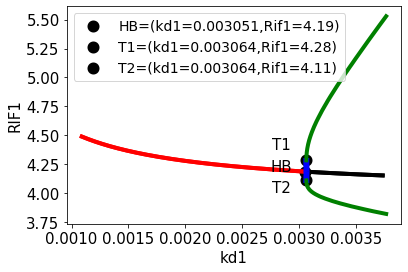

In [107]:
bf_kd1 = bf_data_kd1[bf_data_kd1['P1']==1]
print(bf_kd1.shape)
plt.plot(bf_kd1.X.loc[0:171],bf_kd1.Y.loc[0:171],'r',linewidth=4)
plt.plot(bf_kd1.X.loc[0:171],bf_kd1.Z.loc[0:171],'r',linewidth=4)
plt.scatter(bf_kd1.X.loc[170],bf_kd1.Y.loc[170],color='k',label='HB=(kd1=%f,Rif1=%.2f)'%(bf_kd1.X.loc[170],bf_kd1.Z.loc[170]) ,linewidth=6)
plt.text(bf_kd1.X.loc[170]-0.0003,bf_kd1.Y.loc[170],'HB',color='k',fontsize=15)


bf_kd1 = bf_data_kd1[bf_data_kd1['P1']==2]
print(bf_kd1.shape)
plt.plot(bf_kd1.X.loc[172:200],bf_kd1.Y.loc[172:200],'k',linewidth=4)
plt.plot(bf_kd1.X.loc[172:200],bf_kd1.Z.loc[172:200],'k',linewidth=4)


#plt.plot(bf_kd1.X.loc[172:228],bf_kd1.Y.loc[172:228],'b',linewidth=4)
#plt.plot(bf_kd1.X,bf_kd1.Z,'r',linewidth=4)

bf_kd1 = bf_data_kd1[bf_data_kd1['P1']==4]
print(bf_kd1.shape)
plt.plot(bf_kd1.X.loc[201:227],bf_kd1.Y.loc[201:227],'b',linewidth=6)
plt.plot(bf_kd1.X.loc[201:227],bf_kd1.Z.loc[201:227],'b',linewidth=6)

bf_kd1 = bf_data_kd1[bf_data_kd1['P1']==3]
print(bf_kd1.shape)
plt.plot(bf_kd1.X.loc[228:600],bf_kd1.Y.loc[228:600],'g',linewidth=4)
plt.plot(bf_kd1.X.loc[228:600],bf_kd1.Z.loc[228:600],'g',linewidth=4)

plt.scatter(bf_kd1.X.loc[228],bf_kd1.Y.loc[228],color='k',label='T1=(kd1=%f,Rif1=%.2f)'%(bf_kd1.X.loc[228],bf_kd1.Y.loc[228]) ,linewidth=6)
plt.scatter(bf_kd1.X.loc[228],bf_kd1.Z.loc[228],color='k',label='T2=(kd1=%f,Rif1=%.2f)'%(bf_kd1.X.loc[228],bf_kd1.Z.loc[228]) ,linewidth=6)

plt.text(bf_kd1.X.loc[228]-0.0003,bf_kd1.Y.loc[228]+0.1,'T1',color='k',fontsize=15)
plt.text(bf_kd1.X.loc[228]-0.0003,bf_kd1.Z.loc[228]-0.1,'T2',color='k',fontsize=15)


plt.ylabel('RIF1',fontsize=15)
plt.xlabel('kd1',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=14)
plt.show()


### Saddle Node Bifurcation

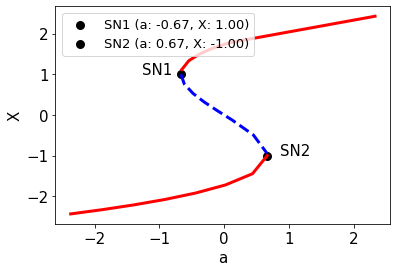

In [109]:
f = pd.read_csv('cubic.dat',sep='\s+',names=['X','Y','Z','P1','P2','P3'])
#plt.plot(f.X[1:10],f.Y[1:10],'r')
#plt.plot(f.X[11:21],f.Y[11:21],'g')
#plt.plot(f.Y[])
plt.plot(f.X[54:64],f.Y[54:64],'r',linewidth=3)
plt.plot(f.X[64:72],f.Y[64:72],'b--',linewidth=3)
plt.plot(f.X[72:80],f.Y[72:80],'r',linewidth=3)

plt.scatter(f.X[64],f.Y[64],color='k',label='SN1 (a: %0.2f, X: %0.2f)'%(f.X[64],f.Y[64]),linewidth=3)
plt.text(f.X[64]-0.6,f.Y[64],'SN1',color='k',fontsize=15)

plt.scatter(f.X[72],f.Y[72],color='k',label='SN2 (a: %0.2f, X: %0.2f)'%(f.X[72],f.Y[72]),linewidth=3)
plt.text(f.X[72]+0.2,f.Y[72],'SN2',color='k',fontsize=15)

plt.xlabel('a',fontsize=15)
plt.ylabel('X',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(loc='upper left',fontsize=13)
plt.show()
